In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
dataset = MNIST(root = "\data", download = True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting \data/MNIST/raw/train-images-idx3-ubyte.gz to \data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 501kB/s]


Extracting \data/MNIST/raw/train-labels-idx1-ubyte.gz to \data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]


Extracting \data/MNIST/raw/t10k-images-idx3-ubyte.gz to \data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.21MB/s]

Extracting \data/MNIST/raw/t10k-labels-idx1-ubyte.gz to \data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, '5')

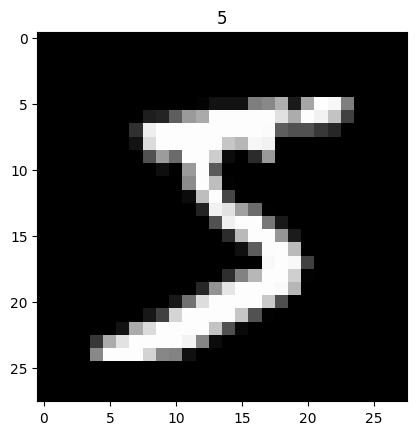

In [ ]:
img, label = dataset[0]
plt.imshow(img, cmap = "gray")
plt.title(label)

In [ ]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [ ]:
# MNIST dataset (images and labels)
train_dataset = MNIST(root='data/',
                train=True,
                download = True,
                transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.9MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.86MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(train_dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
import torch.nn as nn
input_size = 28*28
num_classes = 10

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [ ]:
import torch.nn.functional as F
loss_fn = F.cross_entropy


In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
#New MNIST model after inclusion fo all the required functions inside a single one
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3262126445770264, 'val_acc': 0.11352848261594772}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9525, val_acc: 0.6280
Epoch [1], val_loss: 1.6840, val_acc: 0.7287
Epoch [2], val_loss: 1.4840, val_acc: 0.7616
Epoch [3], val_loss: 1.3333, val_acc: 0.7793
Epoch [4], val_loss: 1.2176, val_acc: 0.7925


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1267, val_acc: 0.8028
Epoch [1], val_loss: 1.0537, val_acc: 0.8096
Epoch [2], val_loss: 0.9940, val_acc: 0.8152
Epoch [3], val_loss: 0.9443, val_acc: 0.8195
Epoch [4], val_loss: 0.9022, val_acc: 0.8229


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8662, val_acc: 0.8276
Epoch [1], val_loss: 0.8349, val_acc: 0.8301
Epoch [2], val_loss: 0.8076, val_acc: 0.8334
Epoch [3], val_loss: 0.7834, val_acc: 0.8348
Epoch [4], val_loss: 0.7618, val_acc: 0.8369


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7425, val_acc: 0.8398
Epoch [1], val_loss: 0.7250, val_acc: 0.8418
Epoch [2], val_loss: 0.7091, val_acc: 0.8430
Epoch [3], val_loss: 0.6947, val_acc: 0.8451
Epoch [4], val_loss: 0.6814, val_acc: 0.8475


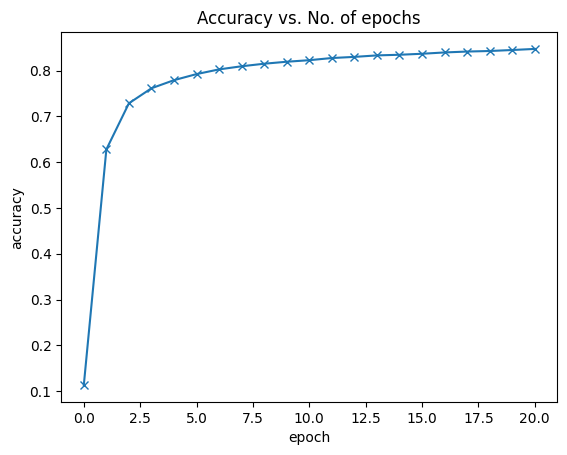

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     download= True,
                     transform=transforms.ToTensor())

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


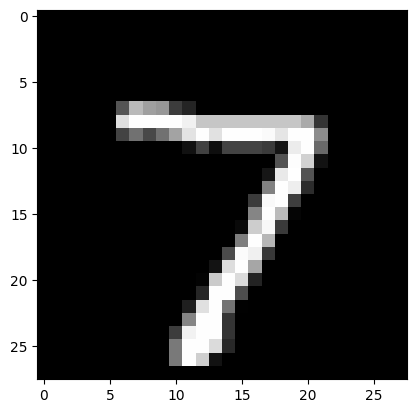

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6410000920295715, 'val_acc': 0.85986328125}